In [6]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("C:/Users/OWUSU/Desktop/ML n DL/Data Files/3. ST Academy - Decision Trees resource files/Movie_classification.csv",header = 0)

In [8]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [9]:
df['Time_taken'].fillna(value = df['Time_taken'].mean(),inplace = True)

In [10]:
df = pd.get_dummies(df,columns=["3D_available","Genre"],drop_first = True)

In [11]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


In [12]:
x = df.loc[:,df.columns!="Start_Tech_Oscar"]

In [13]:
type(x)

pandas.core.frame.DataFrame

In [14]:
x.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [15]:
y = df['Start_Tech_Oscar']

In [16]:
type(y)

pandas.core.series.Series

In [17]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

In [18]:
y.shape

(506,)

In [19]:
x.shape

(506, 20)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [22]:
x_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,53400,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,43400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,54000,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,45800,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,20800,1,0,0,0


In [23]:
x_train.shape

(404, 20)

In [24]:
y_train.shape

(404,)

In [25]:
x_test.shape

(102, 20)

In [26]:
from sklearn import tree

In [27]:
clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [28]:
clftree.fit(x,y)

DecisionTreeClassifier(max_depth=3)

In [29]:
y_train_pred = clftree.predict(x_train)

In [30]:
y_test_pred = clftree.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix 

In [32]:
confusion_matrix(y_train,y_train_pred)
confusion_matrix(y_test,y_test_pred)

array([[42,  2],
       [42, 16]], dtype=int64)

In [33]:
accuracy_score(y_test,y_test_pred)

0.5686274509803921

In [34]:
clftree1 = tree.DecisionTreeClassifier(min_samples_leaf=20,max_depth =4)

In [35]:
clftree1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

In [36]:
y_test_pred = clftree1.predict(x_test)

In [37]:
confusion_matrix(y_test,y_test_pred)

array([[ 8, 36],
       [ 9, 49]], dtype=int64)

In [38]:
accuracy_score(y_test,y_test_pred)

0.5588235294117647

In [39]:
dot_data = tree.export_graphviz(clftree1,out_file=None,feature_names = x_train.columns,filled = True)

In [40]:
from IPython.display import Image
import pydotplus

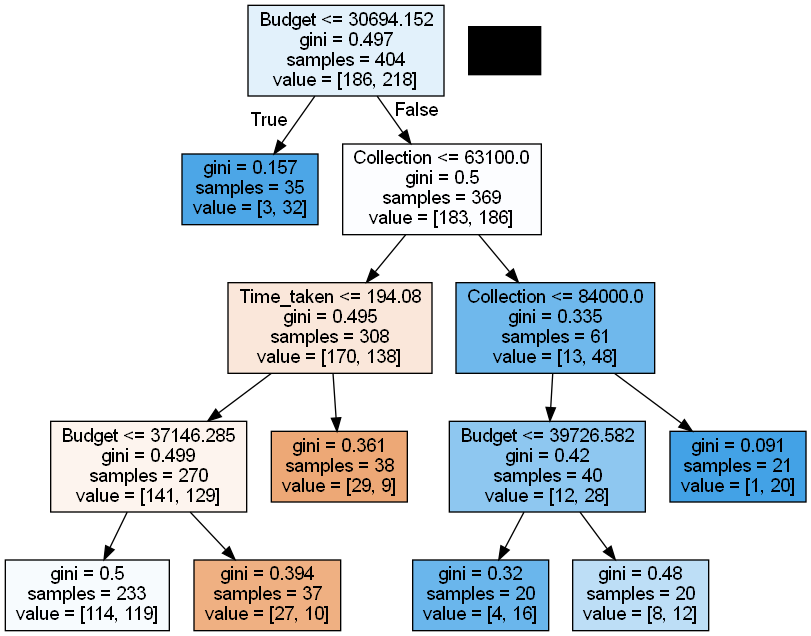

In [41]:
graph1= pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

In [42]:
#Bagging

In [43]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [44]:
from sklearn.ensemble import BaggingClassifier

In [45]:
bag_clf = BaggingClassifier(base_estimator = clftree,n_estimators = 1000,bootstrap = True,n_jobs = -1,random_state = 0)

In [46]:
bag_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=0)

In [47]:
confusion_matrix(y_test,bag_clf.predict(x_test))

array([[28, 16],
       [21, 37]], dtype=int64)

In [48]:
accuracy_score(y_test,bag_clf.predict(x_test))

0.6372549019607843

In [49]:
#Randomforest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [51]:
confusion_matrix(y_test,rf_clf.predict(x_test))

array([[25, 19],
       [18, 40]], dtype=int64)

In [52]:
accuracy_score(y_test,rf_clf.predict(x_test))

0.6372549019607843

In [53]:
#GridSearch

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [56]:
params_grid = {"max_features":[4,5,6,7,8,9,10],
               "min_samples_split":[2,3,4]}

In [57]:
grid_search = GridSearchCV(rf_clf,params_grid,n_jobs=-1,cv= 5,scoring = 'accuracy')

In [58]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [59]:
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 3}

In [60]:
cvrf_clf = grid_search.best_estimator_

In [61]:
accuracy_score(y_test,cvrf_clf.predict(x_test))

0.6274509803921569

In [62]:
#XG Boost

In [63]:
import xgboost as xgb

In [71]:
xgb_clf = xgb.XGBClassifier(max_depth = 5,n_estimators = 1000,learning_rate= 0.3,n_jobs=-1)

In [72]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [73]:
accuracy_score(y_test,xgb_clf.predict(x_test))

0.6764705882352942

In [103]:
xgb_clf2 = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1,random_state=0)

In [104]:
param_test = {'max_depth' : range(3,10,2),
             'gamma': [0.1,0.2,0.3],
             'subsample': [0.8,0.9],
              'reg_alpha': [1e-2,0.1,1]}

In [105]:
grid_search_cv = GridSearchCV(xgb_clf2,param_test,n_jobs=-1,cv=5,scoring='accuracy')

In [106]:
grid_search_cv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [107]:
grid_search_cv.best_params_

{'gamma': 0.2, 'max_depth': 7, 'reg_alpha': 0.1, 'subsample': 0.8}

In [108]:
cvxgb_clf = grid_search_cv.best_estimator_

In [109]:
accuracy_score(y_test,cvxgb_clf.predict(x_test))

0.6666666666666666

In [110]:
cvxgb_clf.predict(x_test)

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [111]:
#Gradient_Boosting

In [112]:
from sklearn.ensemble import GradientBoostingClassifier

In [128]:
 gbc_clf  = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.02,max_depth=1)
    

In [129]:
gbc_clf.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [130]:
accuracy_score(y_test,gbc_clf.predict(x_test))

0.6176470588235294

In [131]:
gbc_clf.predict(x_test)

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [133]:

#Ada_Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_clf = AdaBoostClassifier(base_estimator=clftree1,n_estimators=5000,learning_rate=0.02)

In [ ]:
ada_clf.fit(x_train,y_train)

In [ ]:
accuracy_score(y_test,ada_clf.predict(x_test))